<a href="https://colab.research.google.com/github/jaivanti/syracuse/blob/main/espcn_vid01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install opencv-contrib-python==4.3.0.36

In [3]:
import cv2

In [4]:
from cv2 import dnn_superres

In [6]:
!pip install pafy

In [7]:
!pip install imutils pafy youtube-dl

     |████████████████████████████████| 1.9 MB 5.2 MB/s 


In [8]:
import numpy as np


In [5]:
# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

In [9]:
!mkdir -p /content/PATH/
%cd PATH

/content/PATH


In [10]:
import imutils
import cv2
import pafy
url = 'https://www.youtube.com/watch?v=PCicKydX5GE'
video = pafy.new(url)
videoStream = video.getbestvideo()
vidcap  = cv2.VideoCapture(videoStream.url)

In [11]:
def getFrame(time,frameCount):
   vidcap.set(cv2.CAP_PROP_POS_MSEC,time)
   frameDet, frame = vidcap.read()
   if frameDet:
      frame = imutils.resize(frame,width=255)
      cv2.imwrite(str(frameCount)+".jpg", frame)

In [12]:
startTime = 0
frameRate = 500
frameCount = 1
h,m,s = video.duration.split(sep=':')
endTime = (int(h)*3600 + int(m)*60 +int(s))*1000
for time in range(startTime,endTime,frameRate):
   frameCount = frameCount + 1
   time = round(time,2)
   getFrame(time,frameCount)

In [13]:
#path = "/content/drive/MyDrive/SR CDN/ESPCN_x3.pb" (suyash path)
path = "/content/drive/MyDrive/ESPCN_x3.pb" #(jaivanti path)
sr.readModel(path)

In [14]:
sr.setModel("espcn",3)

In [15]:
import tensorflow as tf
import os,sys

In [16]:
import PIL
import os
from PIL import Image

In [17]:
directory = '/content/PATH/'
for filename in os.scandir(directory):
    if (filename.path.endswith(".jpg") or filename.path.endswith(".png")):
        print(filename.path)
        image = cv2.imread(filename.path)
        result = sr.upsample(image)
        cv2.imwrite("./upscaled.png", result)
        

/content/PATH/6.jpg
/content/PATH/2.jpg
/content/PATH/5.jpg
/content/PATH/3.jpg
/content/PATH/7.jpg
/content/PATH/4.jpg


In [18]:
import time
start = time.time()
upscaled = sr.upsample(image)
end = time.time()
print("[INFO] inference time {:.6f} seconds".format(
	end - start))

[INFO] inference time 0.099705 seconds


In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

In [20]:
directory = '/content/PATH/'
for filename in os.scandir(directory):
    if (filename.path.endswith(".jpg") or filename.path.endswith(".png")):
        print(filename.path)
        image = cv2.imread(filename.path)
        resized = cv2.resize(image,None,fx=3,fy=3)
        cv2.imwrite("./resized.png", result)

/content/PATH/6.jpg
/content/PATH/upscaled.png
/content/PATH/2.jpg
/content/PATH/5.jpg
/content/PATH/3.jpg
/content/PATH/7.jpg
/content/PATH/4.jpg


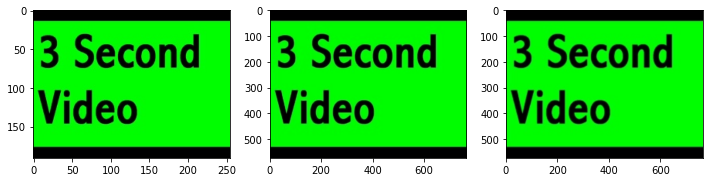

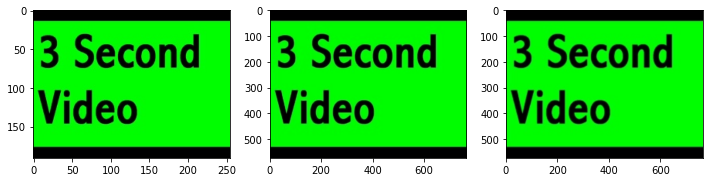

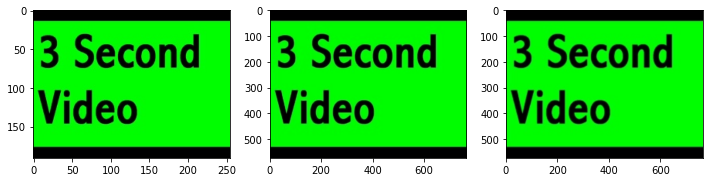

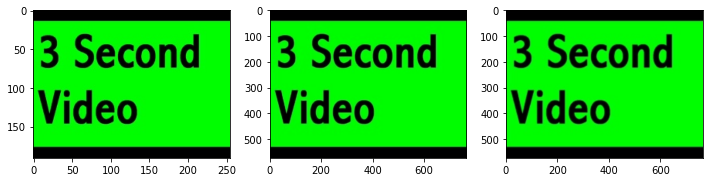

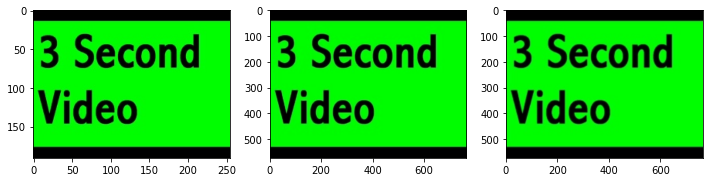

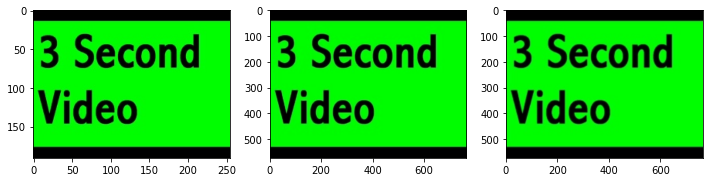

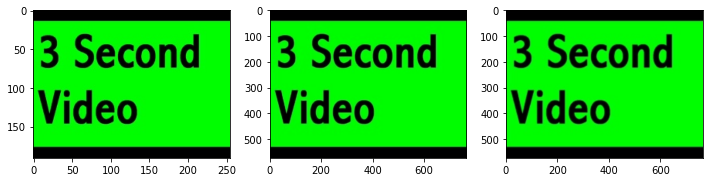

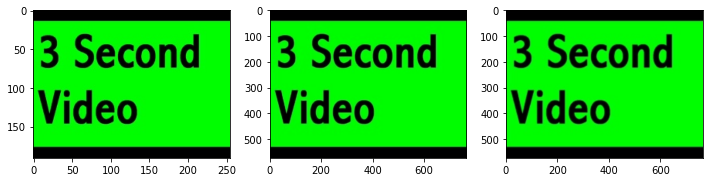

In [21]:
directory = '/content/PATH/'
for filename in os.scandir(directory):
    if (filename.path.endswith(".jpg") or filename.path.endswith(".png")):
        plt.figure(figsize=(12,8))
        plt.subplot(1,3,1)
	# Original image
        plt.imshow(image[:,:,::-1])
        plt.subplot(1,3,2)
	# SR upscaled
        plt.imshow(result[:,:,::-1])
        plt.subplot(1,3,3)
	# OpenCV upscaled
        plt.imshow(resized[:,:,::-1])
        plt.show()

In [22]:
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim

In [31]:
cd resize_img/


[Errno 2] No such file or directory: 'resize_img/'
/content/PATH/resize_img


In [34]:
dir = "/content/PATH/resize_img"
for filename in os.scandir(dir):
    if (filename.path.endswith(".jpg") or filename.path.endswith(".png")):
        print(filename.path)
        image = cv2.imread(filename.path)
        dimensions = image.shape
        print('shape',dimensions)
        #print('PSNR: %f', tf.image.psnr())
        #print("PSNR of super resolved image: %f", tf.image.psnr(result, image, max_val=255))  
        #print("SSIM of super resolved image: %f", tf.image.ssim(image, result, resized).numpy())

/content/PATH/resize_img/frames2.jpg
shape (255, 255, 3)
/content/PATH/resize_img/frames5.jpg
shape (255, 255, 3)
/content/PATH/resize_img/frames0.jpg
shape (255, 255, 3)
/content/PATH/resize_img/frames6.jpg
shape (255, 255, 3)
/content/PATH/resize_img/frames7.jpg
shape (255, 255, 3)
/content/PATH/resize_img/frames1.jpg
shape (255, 255, 3)
/content/PATH/resize_img/frames4.jpg
shape (255, 255, 3)
/content/PATH/resize_img/frames3.jpg
shape (255, 255, 3)


In [32]:
ls

frames0.jpg  frames2.jpg  frames4.jpg  frames6.jpg
frames1.jpg  frames3.jpg  frames5.jpg  frames7.jpg


Original Dimensions :  (573, 765, 3)
Resized Dimensions :  (255, 255, 3)


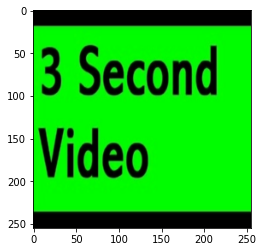

In [24]:
import cv2
 
img = cv2.imread('/content/PATH/upscaled.png', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ', img.shape)
 
scale_percent = 60 # percent of original size
width = 255
height = 255
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
plt.imshow(resized)
plt.show()
 

#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [43]:
import os
from scipy import ndimage, misc

images = []
for root, dirnames, filenames in os.walk("/content/PATH"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            image_resized = misc.imresize(image, (255, 255))
            images.append(image_resized)

NameError: ignored

/content/PATH/6.jpg
Resized Dimensions :  (255, 255, 3)


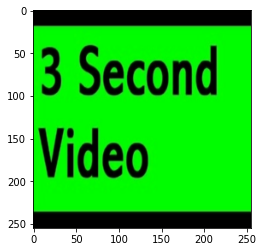

/content/PATH/upscaled.png
Resized Dimensions :  (255, 255, 3)


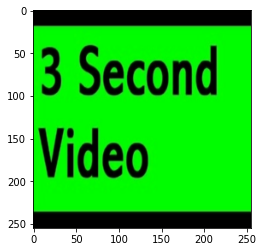

/content/PATH/2.jpg
Resized Dimensions :  (255, 255, 3)


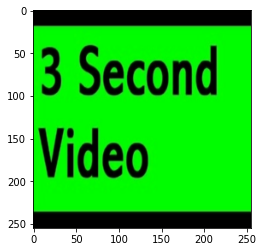

/content/PATH/5.jpg
Resized Dimensions :  (255, 255, 3)


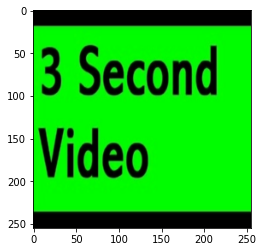

/content/PATH/3.jpg
Resized Dimensions :  (255, 255, 3)


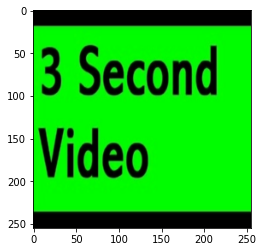

/content/PATH/7.jpg
Resized Dimensions :  (255, 255, 3)


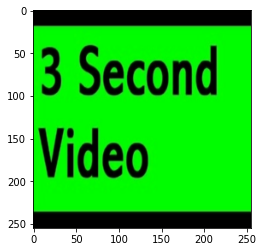

/content/PATH/4.jpg
Resized Dimensions :  (255, 255, 3)


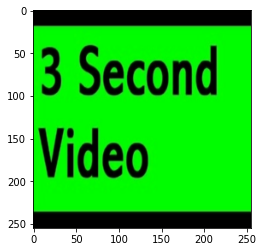

/content/PATH/resized.png
Resized Dimensions :  (255, 255, 3)


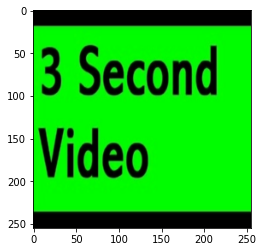

In [27]:
count = 0
for filename in os.scandir(directory):
    if (filename.path.endswith(".jpg") or filename.path.endswith(".png")):
        print(filename.path)
        #image = ndimage.imread(filepath, mode="RGB")
        #image_resized = misc.imresize(image, (255, 255))
        #images.append(image_resized)
        width = 255
        height = 255
        dim = (width, height)
# resize image
        resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        result = sr.upsample(image)
        cv2.imwrite("/content/PATH/resize_img/f.jpg" %count, resized)
        count += 1
        print('Resized Dimensions : ',resized.shape)
        plt.imshow(resized)
        plt.show()

In [29]:
ls

2.jpg  4.jpg  6.jpg  resized.png  upscaled.png
3.jpg  5.jpg  7.jpg  resize_img/


In [25]:
mkdir resize_img

In [36]:
img1 = '/content/PATH/resize_img/frames0.jpg'
img2 = '/content/PATH/resize_img/upscaled.png'

In [37]:
print("SSIM of super resolved image: %f", tf.image.ssim(img1, img2, max_val=255).numpy())

ValueError: ignored

In [35]:
dir = '/content/PATH/resize_img'
for filename in os.scandir(dir):
    if (filename.path.endswith(".jpg") or filename.path.endswith(".png")):
        print(filename.path)
        image = cv2.imread(filename.path)
        result = sr.upsample(image)
        cv2.imwrite("./upscaled.png", result)
        

/content/PATH/resize_img/frames2.jpg
/content/PATH/resize_img/frames5.jpg
/content/PATH/resize_img/frames0.jpg
/content/PATH/resize_img/frames6.jpg
/content/PATH/resize_img/frames7.jpg
/content/PATH/resize_img/frames1.jpg
/content/PATH/resize_img/frames4.jpg
/content/PATH/resize_img/frames3.jpg
